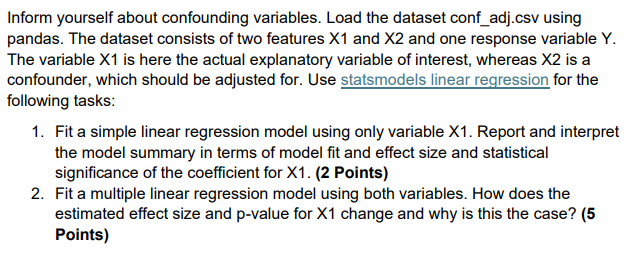

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('conf_adj.csv')

df.head()

,X1,X2,Y
0,11.448315,1,1.265854
1,10.744365,0,1.646329
2,9.969778,1,0.972883
3,9.754193,0,1.650285
4,11.525264,0,1.407837


##### 1. Fit a simple linear regression model using only variable X1. Report and interpret the model summary in terms of model fit and effect size and statistical significance of the coefficient for X1.

In [3]:
# Simple Linear Regression with X1
X1 = df['X1']
Y = df['Y']

X = sm.add_constant(X1)
X.head()

,const,X1
0,1.0,11.448315
1,1.0,10.744365
2,1.0,9.969778
3,1.0,9.754193
4,1.0,11.525264


In [4]:
model = sm.OLS(Y, X)
model_result = model.fit()
print(model_result.summary())
print(f'The Estimated effect size = ' + str(model_result.params['X1']))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     119.9
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.96e-26
Time:                        01:55:21   Log-Likelihood:                -122.93
No. Observations:                1000   AIC:                             249.9
Df Residuals:                     998   BIC:                             259.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2084      0.083     26.505      0.0

__Report Interpretition:__

* The model doesn't fit the data well, as the R-Squared value is Low (0.107).
* The Estimated Effect size = -0.0870, which states that X1 is negatively correlated to Y.
* p-Value of X1 = 0.000, rejecting the null hypothesis (Coefficient of X1 = 0).

a Scatter Plot : X1 vs Y


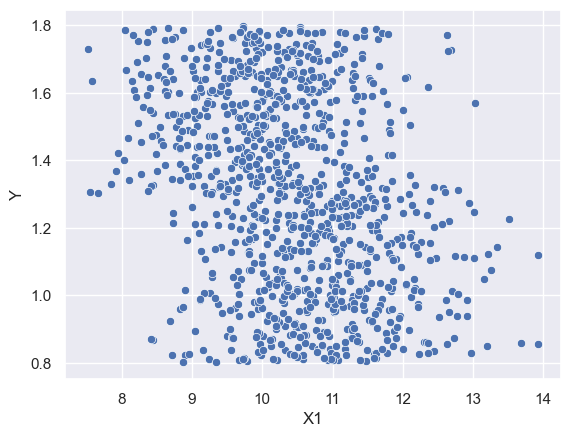

In [5]:
sns.set_theme(style='darkgrid')
print('a Scatter Plot : X1 vs Y')
sns.scatterplot(data=df, x="X1", y='Y')
plt.show()

##### 2. Fit a multiple linear regression model using both variables. How does the estimated effect size and p-value for X1 change and why is this the case? (5 Points) 


In [6]:
X2 = df[['X2']]
X = sm.add_constant(df[['X1', 'X2']])
X.head()

,const,X1,X2
0,1.0,11.448315,1
1,1.0,10.744365,0
2,1.0,9.969778,1
3,1.0,9.754193,0
4,1.0,11.525264,0


In [7]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
print(model_result.summary())

print(f'The Estimated effect size = ' + str(model_result.params['X1']))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     1442.
Date:                Tue, 07 May 2024   Prob (F-statistic):          5.28e-295
Time:                        01:55:22   Log-Likelihood:                 499.98
No. Observations:                1000   AIC:                            -994.0
Df Residuals:                     997   BIC:                            -979.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5194      0.047     32.456      0.0

__Report Interpretation:__

* As we added the confounding variable (X2) to the model, the model fitted the data better with R-Squared Value 0.743.
* p-Value of X1 became larger, accepting the null hypothesis (X1 coef = 0). This is because the coef of X2 is much larger than X1 and the estimation of Y values using the model depends more on X2 rather than X1. In other words, The Report suggests that X1 and Y are (almost) independant variables.
* The Estimated Effect Value became smaller and neglectable because the model give higher weight to variable X2.

* __The Reason__ is, Confounding Variables have impact on the independent variable even if they are not the variable of interest. in Our example, It's Obvious that entries with X2 = 0 have larger Y-value than entries with X2 = 1.

a Box Plot : X2 vs Y


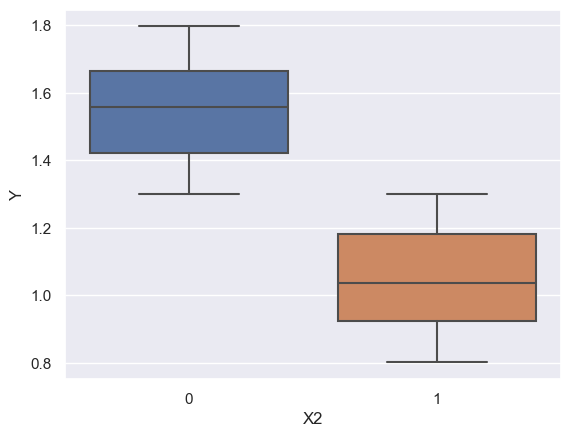

In [8]:
print('a Box Plot : X2 vs Y')
sns.boxplot(data=df, x="X2", y='Y')
plt.show()